In [ ]:
# 5. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form


Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


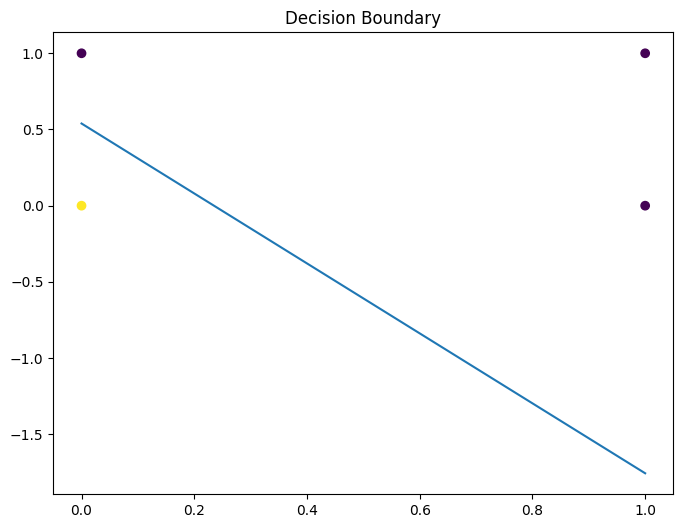

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation(summation)

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def plot_decision_region(self, training_inputs, labels):
        # Plotting training data points
        plt.figure(figsize=(8, 6))
        plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels)

        # Plotting decision boundary
        slope = -self.weights[0] / self.weights[1]
        intercept = -self.bias / self.weights[1]
        x = np.linspace(np.min(training_inputs[:, 0]), np.max(training_inputs[:, 0]), 100)
        y = slope * x + intercept
        plt.plot(x, y)

        plt.title('Decision Boundary')
        plt.show()

# Example usage
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([1, 0, 0, 0])

perceptron = perceptron(input_size=2)
perceptron.train(training_inputs, labels)

# Test the trained perceptron
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for inputs in test_inputs:
    print(f"Input: {inputs}, Predicted Output: {perceptron.predict(inputs)}")

# Plot decision region
perceptron.plot_decision_region(training_inputs, labels)
